## 8) Chunking:
Chunking allows us to identify phrases while tokenization allows us to identify words.

Note: 
- A phrase is a word or group of words that works as a single unit to perform a grammatical function.
- Noun phrases are built around a noun.

    Examples:
    - “A planet”
    - “A tilting planet”
    - “A swiftly tilting planet”

- Chunks donot overlap. So one word can only fall under a single chunk.

Before making chunks,
- Part of Speech (POS) tagging should be done. And for POS tagging, tokenization should be done.

For chunking, "Chunk Grammar" must be defined.
- A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

Creating chunk parser

In [5]:
# for tokenizations:
from nltk.tokenize import word_tokenize

text = "It's a dangerous business, Frodo, going out your door."
text_tokens = word_tokenize(text)
text_tokens

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [6]:
## for POS tagging
# 1st download tagger:
import nltk
nltk.download('averaged_perceptron_tagger')
tags = nltk.pos_tag(text_tokens)
tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

In [9]:
# Creating Chunk Grammar:
grammar = "NP: {<DT>?<JJ>*<NN>}"

This grammar ```NP: {<DT>?<JJ>*<NN>}``` defines :
1. Start with an optional (?) determiner ('DT')
2. Can have any number (*) of adjectives (JJ)
3. End with a noun (<NN>)

In [12]:
## Creating chunk parser:
chunk_parser = nltk.RegexpParser(grammar)

#trying it out with quote i.e. tags:
tree = chunk_parser.parse(tags)
print(tree)

(S
  It/PRP
  's/VBZ
  (NP a/DT dangerous/JJ business/NN)
  ,/,
  Frodo/NNP
  ,/,
  going/VBG
  out/RP
  your/PRP$
  (NP door/NN)
  ./.)


In [17]:
!pip install svgling # to draw in the notebook itself

ERROR: Invalid requirement: '#'


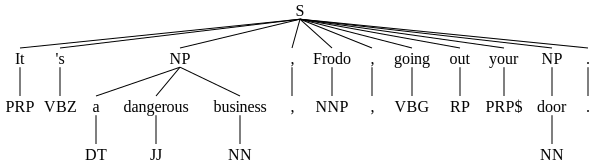

In [20]:
# Draw tree:
#tree.draw()  #to draw in another tkinter window

#for drawing in notebook itself:
tree

- Two noun phrases are:
    - 'a dangerous business' has a determiner, an Adjective, and a noun
    - 'door' has a noun only

## 9) Chinking:
- Chinking is to exclude the pattern while chunking is to include the pattern.

Defining grammar:

In [25]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

The first rule of your grammar is {<.*>+}. This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: <.*>+.

The second rule of your grammar is }<JJ>{. This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: <JJ>.

In [26]:
# Creating chunk parser
chunk_parser = nltk.RegexpParser(grammar)

#trying it out with quote i.e. tags:
tree = chunk_parser.parse(tags)
print(tree)

(S
  (Chunk It/PRP 's/VBZ a/DT)
  dangerous/JJ
  (Chunk
    business/NN
    ,/,
    Frodo/NNP
    ,/,
    going/VBG
    out/RP
    your/PRP$
    door/NN
    ./.))


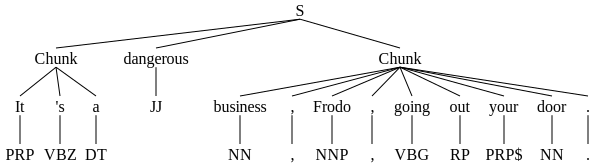

In [27]:
#Drawing tree:
tree

- Adjective 'dangerous' has been excluded.
- Left with two chunks containing everything else.
- 1st chunk contains everything before and 2nd chunk contains after the adjective that is being excluded.

## 10) Name Entity Recognition (NER)

Named entities are noun phrases that refer to specific locations, people, organiztions etc.

- NER can
    - find named entites in text
    - and determine what type of named entity are they

List of named entity types from NLTK Book:

NE type      | Examples
------------ | ----------------------------------------
ORGANIZATION | Georgia-Pacific Corp., WHO
PERSON       | Eddy Bonte, President Obama
LOCATION     | Murray River, Mount Everest
DATE         | June, 2008-06-29
TIME         | two fifty a m, 1:30 p.m.
MONEY        | 175 million Canadian dollars, GBP 10.40
PERCENT      | twenty pct, 18.75 %
FACILITY     | Washington Monument, Stonehenge
GPE          | South East Asia, Midlothian



Use ```nltk.ne_chunk()``` to determine the named entity.

In [31]:
# For finding named entity downlaod:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

binary = False:
- gives Named entitry types as well

binary = True:
- only shows if the give tag is Named Entity or not.

(S
  It/PRP
  's/VBZ
  a/DT
  dangerous/JJ
  business/NN
  ,/,
  (PERSON Frodo/NNP)
  ,/,
  going/VBG
  out/RP
  your/PRP$
  door/NN
  ./.)


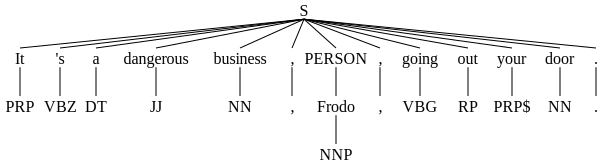

In [41]:
named_entity = nltk.ne_chunk(tags) 
print(named_entity)
#for drawing the named_entity tree
named_entity

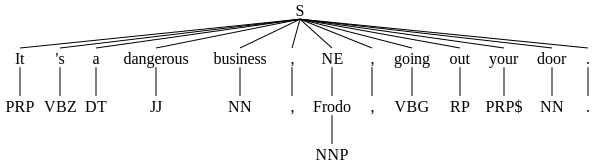

In [58]:
named_entity_binary  = nltk.ne_chunk(tags, binary= True)
named_entity_binary

In [56]:
named_entity[6].label()

'PERSON'

In [60]:
text = '''NLTK is a toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets. A variety of tasks can be performed using NLTK such as tokenizing, parse tree visualization, etc… In this article, we will go through how we can set up NLTK in our system and use them for performing various NLP tasks during the text processing step.'''

In [62]:
# display entities in tabular format
import pandas as pd

entities =[]
labels =[]
for chunk in named_entity:
    if hasattr(chunk,'label'): # it returns True if has label NE
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

,Entities,Labels
0,Frodo,PERSON
